## IPython Notebooks

* You can run a cell by pressing ``[shift] + [Enter]`` or by pressing the "play" button in the menu.
* You can get help on a function or object by pressing ``[shift] + [tab]`` after the opening parenthesis ``function(``
* You can also get help by executing: ``function?``

We'll use the following standard imports.  Execute this cell first:

# Exercise: are first-borns more likely to be late?

This exercise is based on [lecture material by Allen Downey](https://github.com/AllenDowney/CompStats.git).

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [58]:
# this future import makes this code mostly compatible with Python 2 and 3
from __future__ import print_function, division

import random

import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

Are first babies more likely to be late?
----------------------------------------

Allen Downey wrote a popular blog post about this topic:

http://allendowney.blogspot.com/2011/02/are-first-babies-more-likely-to-be-late.html

We are going to investigate the question for ourselves, based on data from the National Survey of Family Growth (NSFG).

Use the Pandas ``read_csv`` command to load ``data/2002FemPreg.csv.gz``.

In [59]:
preg = pd.read_csv('data/2002FemPreg.csv.gz')

- The variable **`outcome`** encodes the outcome of the pregnancy.  Outcome 1 is a live birth.
- The variable **`pregordr`** encodes for first pregnancies (==1) and others (>1).
- The variables **`prglngth`** encodes for the length of pregnancy up to birth.

In [60]:
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
dtype: int64

In [61]:
preg.pregordr.value_counts().sort_index()

1     5033
2     3766
3     2334
4     1224
5      613
6      308
7      158
8       78
9       38
10      17
11       8
12       5
13       3
14       3
15       1
16       1
17       1
18       1
19       1
dtype: int64

Let's visualize the number of births over different weeks:

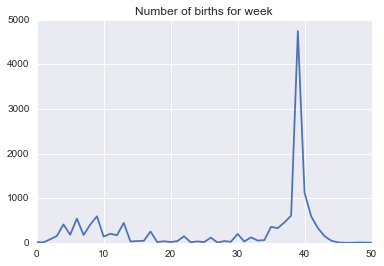

In [62]:
preg.prglngth.value_counts().sort_index().plot(title='Number of births for week')

And here is the total number of babies born up to a certain week:

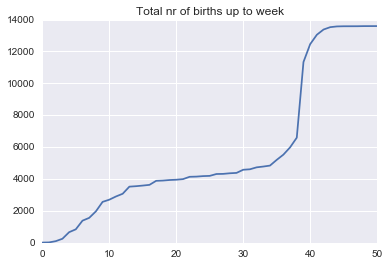

In [63]:
preg.prglngth.value_counts().sort_index().cumsum().plot(title='Total nr of births up to week')

Now, create a Pandas dataframe containing *only* the three columns of interest.  **Hint:** ``loc``

In [64]:
pp = preg.loc[:, ['outcome', 'pregordr', 'prglngth']]
pp.head()

,outcome,pregordr,prglngth
0,1,1,39
1,1,2,39
2,1,1,39
3,1,2,39
4,1,3,39


Now, select only entries where ``outcome`` is 1 (i.e., live births).

In [65]:
pp = pp[pp.outcome == 1]

Also, we are only interested in whether babies are first born or not, so set any entries for ``pregordr`` that are  !=1 to the value 2.  *Hint:* Use ``.loc`` with two indices.

In [66]:
pp.loc[pp.pregordr != 1, 'pregordr'] = 2
pp.head()

,outcome,pregordr,prglngth
0,1,1,39
1,1,2,39
2,1,1,39
3,1,2,39
4,1,2,39


In [69]:
pp.groupby('pregordr').describe()

outcome     prglngth
pregordr                            
1        count     3368  3368.000000
         mean         1    38.584323
         std          0     2.681048
         min          1    17.000000
         25%          1    39.000000
         50%          1    39.000000
         75%          1    40.000000
         max          1    48.000000
2        count     5780  5780.000000
         mean         1    38.546713
         std          0     2.714811
         min          1     0.000000
         25%          1    39.000000
         50%          1    39.000000
         75%          1    39.000000
         max          1    50.000000

Create two dataframes.  One with first pregnancies, and one with all the rest.

In [70]:
firsts = pp[pp.pregordr == 1]
others = pp[pp.pregordr != 1]

Computer the mean difference in weeks:

In [71]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.584323040380049, 38.54671280276817)

The difference is very small--a few hours!

### Let's see if we can visualize the difference in the histograms.

1. From the first pregnancy table, select column ``prglngth``, then call ``hist`` on it.
2. You will get better results if you specify bins to ``hist``, with ``bins=range(50)``.
3. Do the same for other births.
4. To optimally compare the two histograms, set the x-axis to be the same with ``plt.xlim(30, 45)``

(30, 45)

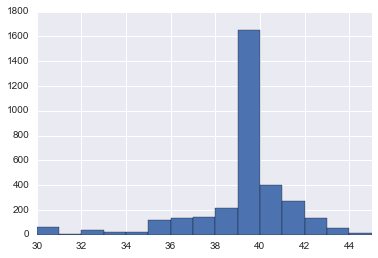

In [72]:
firsts.prglngth.hist(bins=range(50))
plt.xlim(30, 45)

(30, 45)

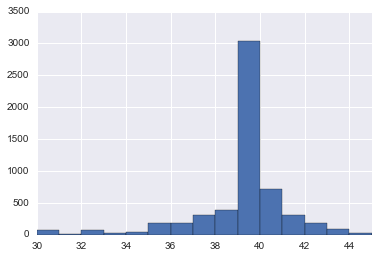

In [73]:
others.prglngth.hist(bins=range(50))
plt.xlim(30, 45)

I wrote a little utility function to help us plot the distributions side-by-side.  See if you can read the code below and figure out what it does:

In [33]:
LILAC = '#998ec3'
ORANGE = '#f1a340'


def hist_two(series_A, series_B,
             labels=['series_A', 'series_B'],
             normalize=False, cumulative=False, bar_or_line='bar'):

    fig, ax = plt.subplots(figsize=(10, 5))
    
    a_heights, a_bins = np.histogram(series_A, bins=range(45), normed=normalize)
    b_heights, b_bins = np.histogram(series_B, bins=a_bins, normed=normalize)
    
    if cumulative:
        a_heights = np.cumsum(a_heights)
        b_heights = np.cumsum(b_heights)

    width = (a_bins[1] - a_bins[0])/2.5

    if bar_or_line == 'bar':
        ax.bar(a_bins[:-1], a_heights, width=width, facecolor=LILAC, label=labels[0])
        ax.bar(b_bins[:-1] + width, b_heights, width=width, facecolor=ORANGE, label=labels[1])
    else:
        plt.plot(a_bins[:-1], a_heights, linewidth=4, color=LILAC, label=labels[0])
        plt.plot(b_bins[:-1], b_heights, linewidth=4, color=ORANGE, label=labels[1])

    plt.legend(loc='upper left')

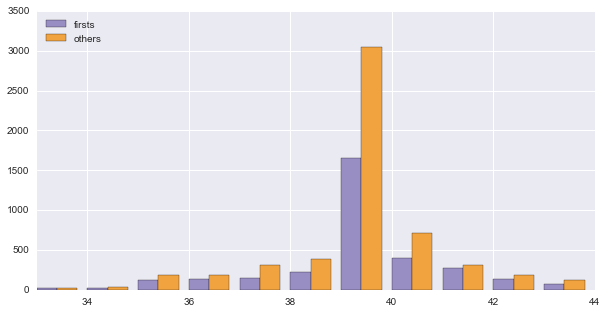

In [34]:
hist_two(firsts.prglngth, others.prglngth, labels=['firsts', 'others'])
plt.xlim(33, 44);

Remember that the vertical axis is counts.  In this case, we are comparing counts with different totals, which might be misleading.

An alternative is to compute a probability mass function (PMF), which divides the counts by the totals, yielding a map from each element to its probability.

The probabilities are "normalized" to add up to 1.


Now we can compare histograms fairly.

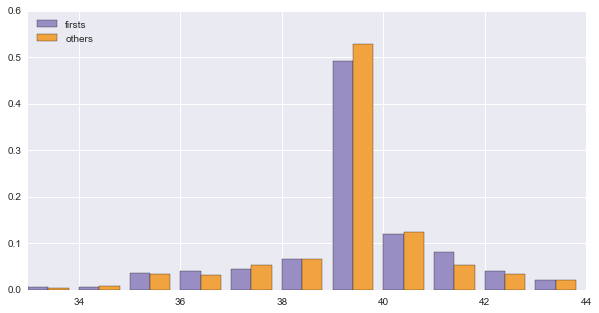

In [35]:
hist_two(firsts.prglngth, others.prglngth, labels=['firsts', 'others'], normalize=True)
plt.xlim(33, 44);

We see here that some of the difference at 39 weeks was an artifact of the different samples sizes.

Even so, it is not easy to compare histograms.  One more alternative is the cumulative histogram, which shows, for each $t$, the total probability up to and including $t$.

In [36]:
pp = live.loc[:, ['birthord','prglngth']]
not_firsts = pp['birthord'] != 1
pp.loc[not_firsts, 'birthord'] = 2

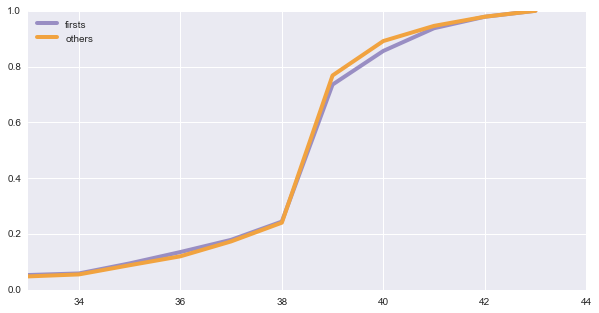

In [37]:
hist_two(firsts.prglngth, others.prglngth, labels=['firsts', 'others'], normalize=True, cumulative=True, bar_or_line='line')
plt.xlim(33, 44);

The cumulative histograms are similar up to week 38.  After that, first babies are more likely to be born late. 

*Can you read this from the plot above?*

One other thought: cumulative curves are often a good option for visualizing noisy series.  For example, the graphic below works pretty well despite some questionable aesthetic choices. 

<img src="figures/cumulative_snowfall.png"/>